In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import time
warnings.simplefilter("ignore")

In [142]:
train_df = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
test_df = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")

In [143]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [144]:
train_df.drop(["casual","registered"],axis=1,inplace=True)


In [145]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [146]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [147]:
train_df["datetime"] = pd.to_datetime(train_df["datetime"])
test_df["datetime"] = pd.to_datetime(test_df["datetime"])

In [148]:
df = pd.concat([train_df,test_df])
df["month"] = df["datetime"].dt.month
df['week'] = df['datetime'].dt.week
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df['time'] = df['datetime'].dt.date - df['datetime'].dt.date.min()
df['time'] = df['time'].apply(lambda x : x.days)
df["count"] = np.log1p(df["count"])
df["dayofweek"] = df["datetime"].dt.dayofweek
df['season'] = df['season'].astype(object)
df['sweather'] = df['weather'].astype(object)
df['dayofweek'] = df['dayofweek'].astype(object)
df = pd.get_dummies(df)
df.drop("datetime",inplace=True,axis=1)
df

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,week,...,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,sweather_1,sweather_2,sweather_3,sweather_4
0,0,0,1,9.84,14.395,81,0.0000,2.833213,1,52,...,0,0,0,0,1,0,1,0,0,0
1,0,0,1,9.02,13.635,80,0.0000,3.713572,1,52,...,0,0,0,0,1,0,1,0,0,0
2,0,0,1,9.02,13.635,80,0.0000,3.496508,1,52,...,0,0,0,0,1,0,1,0,0,0
3,0,0,1,9.84,14.395,75,0.0000,2.639057,1,52,...,0,0,0,0,1,0,1,0,0,0
4,0,0,1,9.84,14.395,75,0.0000,0.693147,1,52,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,1,2,10.66,12.880,60,11.0014,NaN,12,1,...,0,0,0,0,0,0,0,1,0,0
6489,0,1,2,10.66,12.880,60,11.0014,NaN,12,1,...,0,0,0,0,0,0,0,1,0,0
6490,0,1,1,10.66,12.880,60,11.0014,NaN,12,1,...,0,0,0,0,0,0,1,0,0,0
6491,0,1,1,10.66,13.635,56,8.9981,NaN,12,1,...,0,0,0,0,0,0,1,0,0,0


In [149]:
train_df = df[df["day"]<=19]
test_df = df[df["day"]>19]

Text(0.5, 1.0, 'humidity')

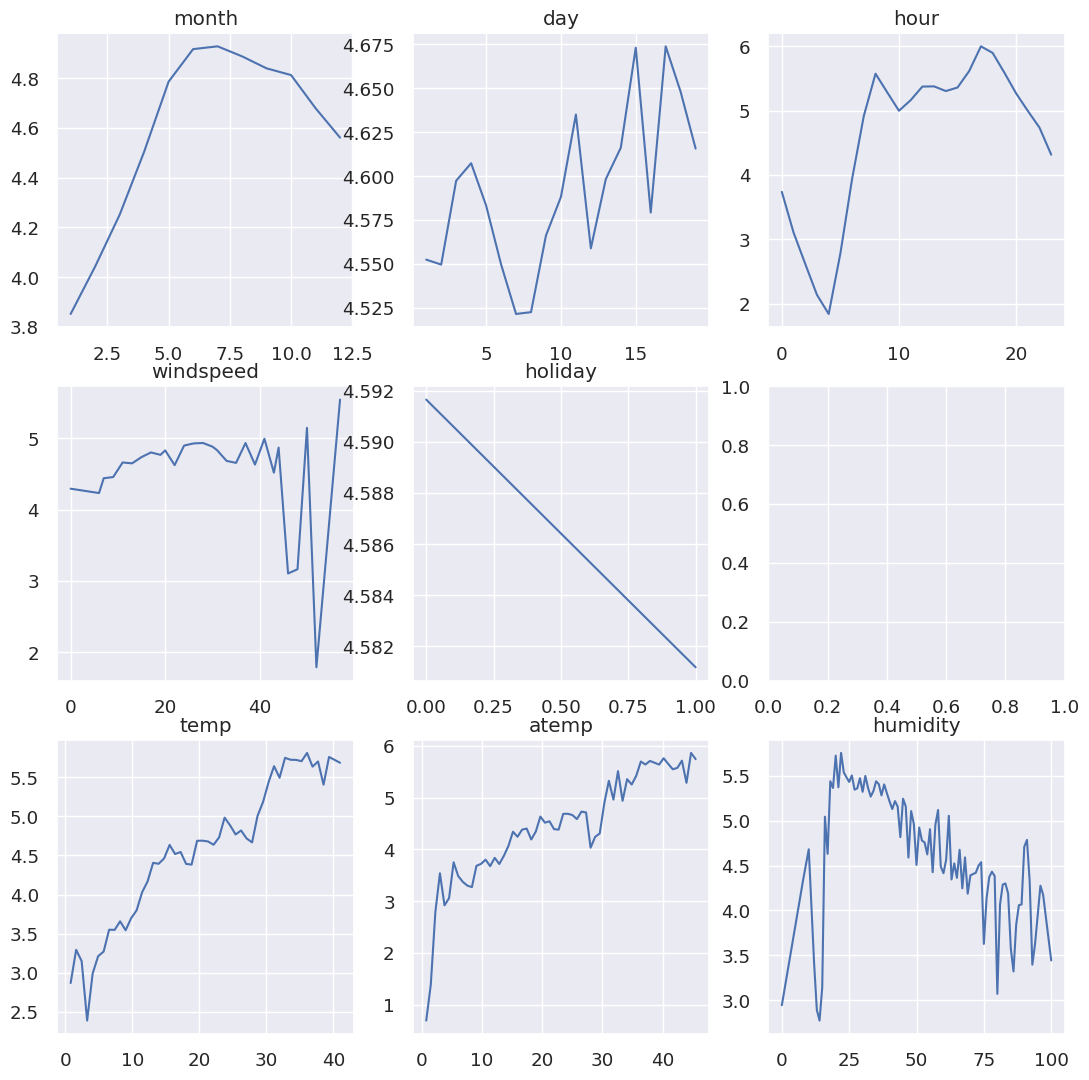

In [150]:
fig, ax = plt.subplots(3, 3, figsize = (13,13))
ax[0,0].plot(train_df.groupby(["month"]).agg({"count":"mean"}))
ax[0,1].plot(train_df.groupby(["day"]).agg({"count":"mean"}))
ax[0,2].plot(train_df.groupby(["hour"]).agg({"count":"mean"}))

ax[1,0].plot(train_df.groupby(["windspeed"]).agg({"count":"mean"}))
ax[1,1].plot(train_df.groupby(["holiday"]).agg({"count":"mean"}))

ax[2,0].plot(train_df.groupby(["temp"]).agg({"count":"mean"}))
ax[2,1].plot(train_df.groupby(["atemp"]).agg({"count":"mean"}))
ax[2,2].plot(train_df.groupby(["humidity"]).agg({"count":"mean"}))



ax[0,0].set_title('month')
ax[0,1].set_title('day')
ax[0,2].set_title('hour')
ax[1,0].set_title('windspeed')
ax[1,1].set_title('holiday')
ax[2,0].set_title('temp')
ax[2,1].set_title('atemp')
ax[2,2].set_title('humidity')


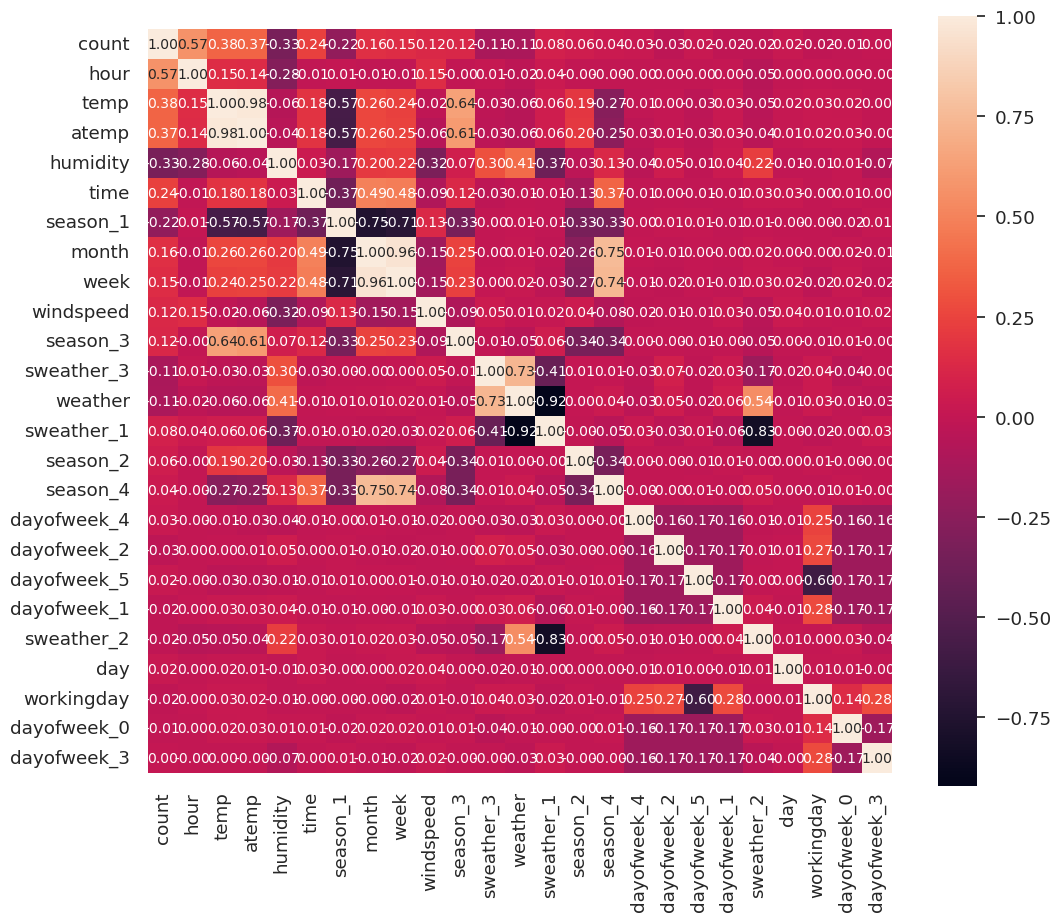

In [151]:
TARGET = "count"
k = 25
corrmat = train_df.corr()
corrmat = np.abs(corrmat)
cols = corrmat.nlargest(k, TARGET)[TARGET].index
cm = np.corrcoef(train_df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2,font="IPAexGothic")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [135]:
!pip install pycaret -q

ERROR: Cannot uninstall numpy 1.21.6, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps numpy==1.21.6'.


In [136]:
from pycaret.regression import setup, compare_models, blend_models, finalize_model, predict_model, plot_model

In [137]:
def pycaret_model(train, target, test, n_select, fold, opt):
  print('Setup Your Data....')
  setup(data=train,
              target=target,
              numeric_imputation = 'mean',
              silent= True)
  
  print('Comparing Models....')
  best = compare_models(sort=opt, n_select=n_select, fold = fold, exclude = ['xgboost'])

  print('Here is Best Model Feature Importances!')
  plot_model(estimator = best[0], plot = 'feature')
  
  print('Blending Models....')
  blended = blend_models(estimator_list= best, fold=fold, optimize=opt)
  pred_holdout = predict_model(blended)
    
  print('Finallizing Models....')
  final_model = finalize_model(blended)
  print('Done...!!!')

  pred_esb = predict_model(final_model, test)
  re = pred_esb['Label']

  return re

In [152]:
sub = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv")
sub

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [153]:
sub["count"] = np.exp(pycaret_model(train_df, 'count', test_df, 5, 3, 'RMSLE'))-1

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2020,0.0872,0.2954,0.9562,0.0809,0.0697
1,0.2041,0.0870,0.2950,0.9574,0.0775,0.0676
2,0.1990,0.0813,0.2851,0.9580,0.0734,0.0637
Mean,0.2017,0.0852,0.2918,0.9572,0.0773,0.0670
Std,0.0021,0.0028,0.0048,0.0007,0.0031,0.0025


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.2002,0.0833,0.2887,0.9597,0.0808,0.0707


Finallizing Models....
Done...!!!


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0,0,0,0,0,0


In [154]:
sub.to_csv("/kaggle/working/auto2.csv",index=False)